# 연속형 확률변수
이산형 확률변수와 연속형 확률변수의 주된 차이는 확률변수가 취할 수 있는 값이 이산적인가 연속적인가이다. 연속형 확률변수의 경우 계산 과정에 적분이 포함된다. 적분은 SciPy의 integral 모듈을 사용하여 구현함


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import warnings
warnings.filterwarnings('ignore', category=integrate.IntegrationWarning)

%precision 3

'%.3f'

## 미적분 관계

- 총효용과 한계효용간의 관계를 미적분으로 설명할 수 있다.
- 총효용곡선의 특정 x에 대한 y값은 한계효용곡선의 하방면적과 같고 한계효용곡선의 특정 x에 대한 y값은 총효용곡선의 x에서의 기울기와 같다.

<img src = '미적분관계1.jpg' STYLE='width 100px;'>
<img src = '미적분관계3.jpg' STYLE='width 100px;'>


C:\Users\admin\AppData\Local\Temp\ipykernel_13156\574421191.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, f(x), 'b-', lw=1, c='k')
C:\Users\admin\AppData\Local\Temp\ipykernel_13156\574421191.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, g(x), 'b-', lw=1, c='b')


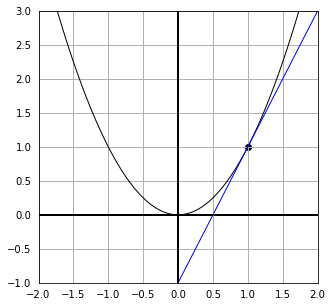

In [5]:
def f(x):
    return(x**2)
def g(x):
    return(2*x -1)

# x가 1일때의 접선의 방정식 2x -1, 기울기는 1
x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.scatter([1],[1],c='k')
plt.plot(x, f(x), 'b-', lw=1, c='k')
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(-1, 3)
plt.xlim(-2, 2)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13156\23841766.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, g(x), 'b-', lw=1, c='b')


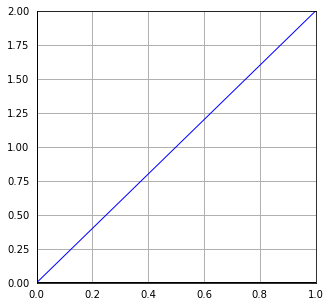

In [6]:
def g(x):
    return(2*x) 

x = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(5,5))
plt.plot(x, g(x), 'b-', lw=1, c='b')
plt.plot([x.min(), x.max()], [0, 0], lw=2, c='k')
plt.plot([0, 0], [g(x).min(), f(x).max()], lw=2, c='k')
plt.ylim(0, 2)
plt.xlim(0, 1)
plt.grid(lw=1)
# plt.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
plt.tick_params(color='white')
plt.show()


### 1차원 연속형 확률변수의 정의
- 확률변수가 취할 수 있는 값은 구간 [a,b]로 정의되며 확률은 확률밀도함수(PDF) 또는 간단히 밀도함수라고 부르는 f(x)에 의해 정의된다.
- 밀도함수 등으로 둘러싸인 영역의 면적이 확률이 된다는 연속형 확률변수의 개념이 중요하다.


#### 과제 0829_1
p.173 ~ 180 예제 풀어보기

In [9]:
x_range = np.array([0,1])

def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0
    
X = [x_range, f]

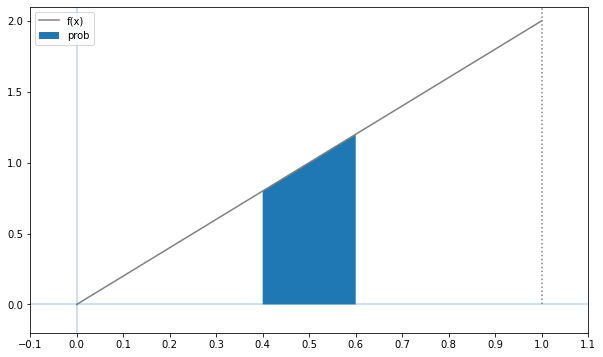

In [12]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs,[f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

xs = np.linspace(0.4, 0.6, 100)
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [14]:
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [16]:
from scipy.optimize import minimize_scalar

res=minimize_scalar(f)

res.fun

0

In [17]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [18]:
def F(x):
    return integrate.quad(f,-np.inf, x)[0]

F(0.6) - F(0.4)

0.200

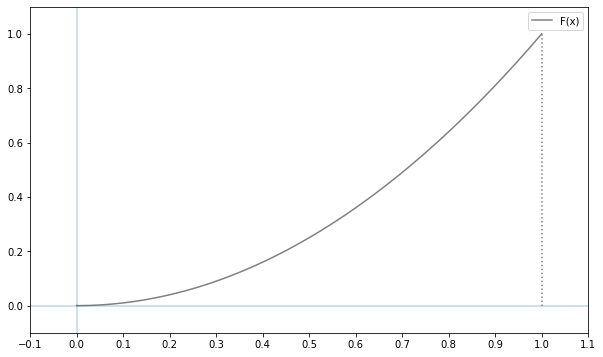

In [19]:
xs = np.linspace(x_range[0],x_range[1],100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(xs,[F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1,1.1)
ax.set_ylim(-0.1,1.1)
ax.legend()

plt.show()

#### 과제 0829_2
p.181 ~ 187 예제 풀어보기

In [20]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y-3)/2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

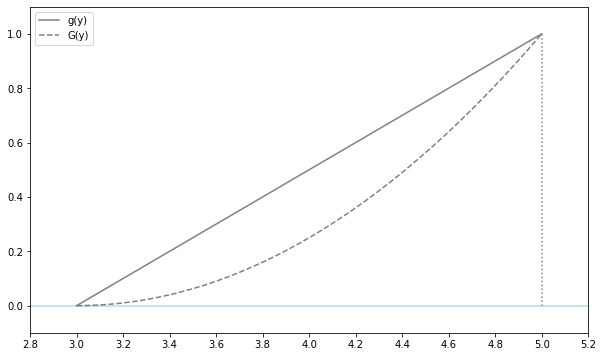

In [21]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys], label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys], label='G(y)', ls='--', color='gray')
ax.hlines(0,2.8,5.2,alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [22]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [23]:
def E(X, g=lambda x: x):
    x_range, f=X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

E(X)

0.667

In [24]:
E(X, g=lambda x: 2*x+3)

4.333

In [25]:
mean = E(X)
def integrand(x):
    return(x - mean) **2 *f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [26]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x)-mean) **2 *f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

V(X)

0.056

In [27]:
V(X, lambda x: 2*x+3)

0.222

In [28]:
2**2 * V(X)

0.222

#### 과제 0829_3
p.188 ~ 191 예제 풀어보기

In [30]:
x_range = [0,2]
y_range = [0,1]

def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4  * y * (x-y)
    else:
        return 0

XY = [x_range, y_range, f_xy]

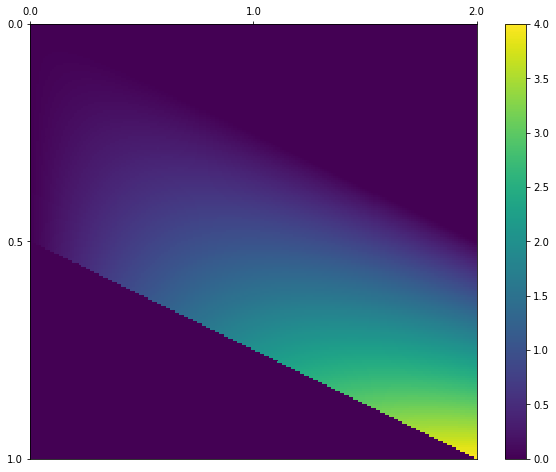

In [32]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x,y) for y in ys] for x in xs])
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0,200,3), minor=False)
ax.set_yticks(np.linspace(0,200,3), minor=False)
ax.set_xticklabels(np.linspace(0,2,3))
ax.set_yticklabels(np.linspace(0,1,3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [35]:
integrate.nquad(f_xy, [[-np.inf, np.inf],
                       [-np.inf, np.inf]])[0]

1.326

#### 과제 0829_4
미분, 적분 공부한 후 미적분 관계를 설명해보세요.